
# 🏦 Bank Transactions ETL Pipeline (Python + Power BI Style)

This notebook demonstrates an end-to-end **ETL (Extract, Transform, Load)** data engineering workflow using Python.
The output includes **Power BI–style dashboards** built with Matplotlib for portfolio and GitHub display.

📁 **Project Structure**
```
bank_etl_project/
├── data/
│   ├── bank_transactions_raw.csv
│   └── processed/
├── dashboards/
│   ├── monthly_trends.png
│   ├── regional_flows.png
│   └── top_merchants.png
├── scripts/
│   └── etl_pipeline.py
├── requirements.txt
└── bank_etl_pipeline.ipynb   👈 this notebook
```

✅ **Goals of the project:**
- Clean and process raw banking transactions  
- Calculate inflow, outflow, and net cash flow  
- Aggregate metrics by **month**, **region**, and **merchant**  
- Generate portfolio-ready **dashboard images**


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Paths
BASE = Path.cwd()
RAW = BASE / "data" / "bank_transactions_raw.csv"
PROCESSED_DIR = BASE / "data" / "processed"
DASH_DIR = BASE / "dashboards"

PROCESSED_DIR.mkdir(parents=True, exist_ok=True)
DASH_DIR.mkdir(parents=True, exist_ok=True)

# Display paths
BASE, RAW


(WindowsPath('C:/Users/prane/Downloads/bank_etl_project'),
 WindowsPath('C:/Users/prane/Downloads/bank_etl_project/data/bank_transactions_raw.csv'))


## 📥 Step 1 — Extract Data

We start by loading the raw CSV file containing synthetic **banking transactions**.


In [6]:

df = pd.read_csv(RAW, parse_dates=["date"])
df.head()


,transaction_id,account_id,date,region,txn_type,merchant,amount
0,3581,100062,2024-01-01,East,Withdrawal,—,-99.30
1,3072,100472,2024-01-01,South,POS,Lyft,-212.91
2,3276,100424,2024-01-01,South,POS,Lyft,-177.34
3,1029,100442,2024-01-01,South,Withdrawal,—,-38.89
4,447,100344,2024-01-01,East,Deposit,—,32.78



## 🔄 Step 2 — Transform Data

We clean and prepare the data for analysis:
- Fill missing merchant names
- Normalize transaction types
- Create inflow / outflow / net columns
- Aggregate metrics by **month**, **region**, and **merchant**


In [7]:

df["merchant"] = df["merchant"].fillna("—")
df["txn_type"] = df["txn_type"].str.title()
df["year_month"] = df["date"].dt.to_period("M").astype(str)
df["inflow"] = np.where(df["amount"]>0, df["amount"], 0.0)
df["outflow"] = np.where(df["amount"]<0, -df["amount"], 0.0)
df["net"] = df["amount"]

monthly = (df.groupby("year_month", as_index=False)
           .agg(total_inflow=("inflow","sum"),
                total_outflow=("outflow","sum"),
                net_flow=("net","sum"),
                txn_count=("transaction_id","count")))

regional = (df.groupby("region", as_index=False)
           .agg(total_inflow=("inflow","sum"),
                total_outflow=("outflow","sum"),
                net_flow=("net","sum"),
                txn_count=("transaction_id","count"))
           .sort_values("net_flow", ascending=False))

top_merchants = (df[df["merchant"]!="—"]
                 .groupby("merchant", as_index=False)
                 .agg(spend=("outflow","sum"), txns=("transaction_id","count"))
                 .sort_values("spend", ascending=False)
                 .head(10))

monthly.head(), regional.head(), top_merchants.head()


(  year_month  total_inflow  total_outflow  net_flow  txn_count
 0    2024-01      15818.18       25413.20  -9595.02        348
 1    2024-02      14064.10       24635.34 -10571.24        321
 2    2024-03      10904.11       24367.10 -13462.99        310
 3    2024-04      14644.95       25288.31 -10643.36        349
 4    2024-05      13793.40       28178.25 -14384.85        365,
   region  total_inflow  total_outflow  net_flow  txn_count
 3   West      40964.83       69251.34 -28286.51        977
 0   East      41230.68       71779.72 -30549.04        964
 1  North      37787.50       72802.87 -35015.37       1002
 2  South      40062.89       83951.70 -43888.81       1057,
    merchant    spend  txns
 14  Walmart  6911.28    50
 1    Amazon  6117.40    54
 0    Airbnb  5823.90    51
 6    Google  5534.70    38
 12   Target  5531.70    46)


## 💾 Step 3 — Load Data

We save the cleaned and aggregated datasets into the `data/processed/` directory.


In [8]:

df.to_csv(PROCESSED_DIR / "transactions_clean.csv", index=False)
monthly.to_csv(PROCESSED_DIR / "monthly_summary.csv", index=False)
regional.to_csv(PROCESSED_DIR / "regional_summary.csv", index=False)
top_merchants.to_csv(PROCESSED_DIR / "top_merchants.csv", index=False)
print("✅ Data successfully saved to data/processed/")


✅ Data successfully saved to data/processed/



## 📊 Step 4 — Visualize Dashboard (Power BI Style)

We create clean, portfolio-ready charts with **Matplotlib**.


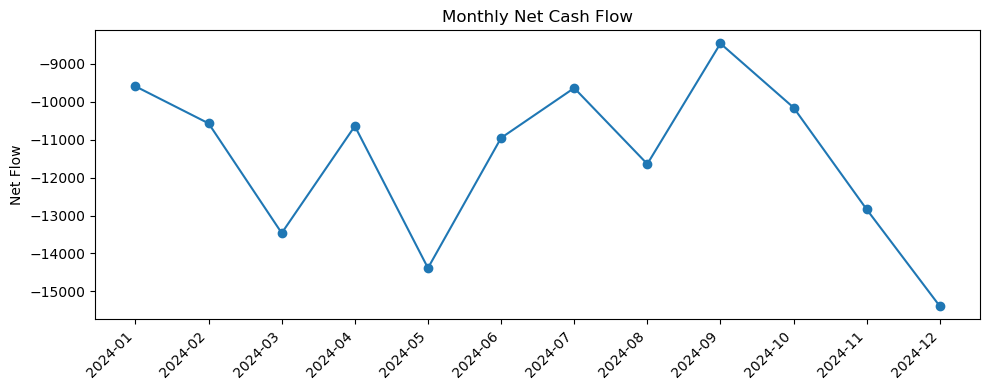

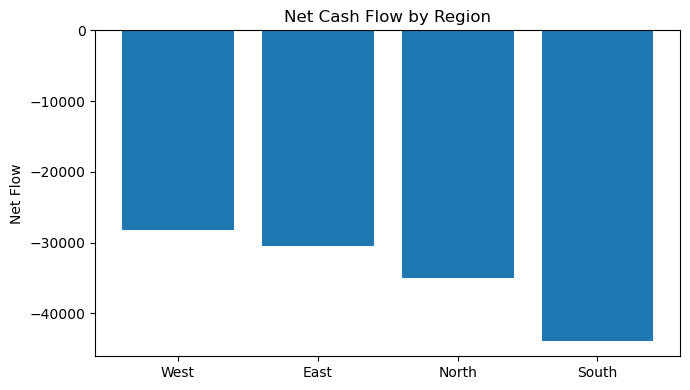

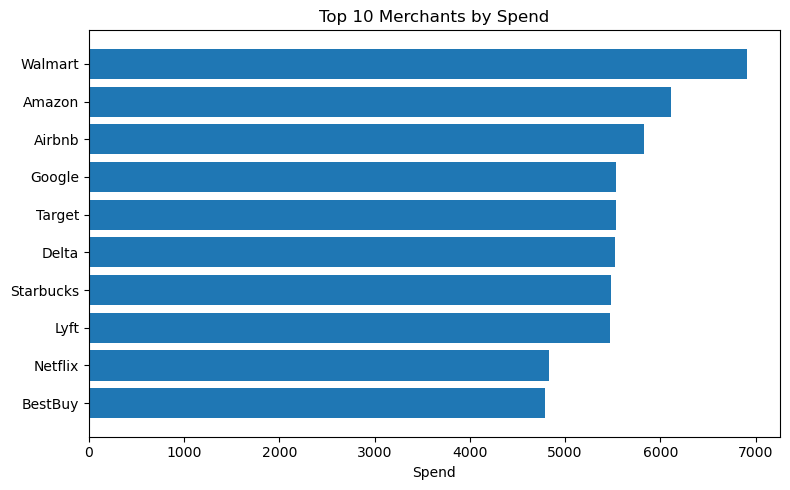

In [9]:

# Monthly Trends
plt.figure(figsize=(10,4))
plt.plot(monthly["year_month"], monthly["net_flow"], marker="o")
plt.xticks(rotation=45, ha="right")
plt.title("Monthly Net Cash Flow")
plt.ylabel("Net Flow")
plt.tight_layout()
plt.savefig(DASH_DIR / "monthly_trends.png", dpi=150)
plt.show()

# Regional
plt.figure(figsize=(7,4))
plt.bar(regional["region"], regional["net_flow"])
plt.title("Net Cash Flow by Region")
plt.ylabel("Net Flow")
plt.tight_layout()
plt.savefig(DASH_DIR / "regional_flows.png", dpi=150)
plt.show()

# Top Merchants
plt.figure(figsize=(8,5))
plt.barh(top_merchants["merchant"], top_merchants["spend"])
plt.gca().invert_yaxis()
plt.xlabel("Spend")
plt.title("Top 10 Merchants by Spend")
plt.tight_layout()
plt.savefig(DASH_DIR / "top_merchants.png", dpi=150)
plt.show()



## 🖼️ Step 5 — Dashboard Preview

After running the notebook, the images below are saved in the `dashboards/` folder.  
You can embed them in your **GitHub README** or **resume**.

- `monthly_trends.png`  
- `regional_flows.png`  
- `top_merchants.png`
